In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from numpy import matrix
from numpy.linalg import inv


In [22]:
# Initialization
# Angles in degrees
t0 = 0
t1 = 0
t2 = 0

# Joint lengths
a0 = 2
a1 = 7
a2 = 1

inside = True

In [23]:
# Theta Values in radians
t0 = t0/180*np.pi
t1 = t1/180*np.pi
t2 = t2/180*np.pi

In [24]:
# Delta values
dT0 = 0.0001

t0_1 = t0 + dT0
t1_1 = t1 + dT0
t2_1 = t2 + dT0

In [25]:
# Desired Values
e_des = np.matrix([[8],[1]])


In [26]:
class Forward_kinematics():
    
    def init(self):
        self.joint1         = t0
        self.joint2         = t1
        self.joint3         = t2
        self.param_table    = [[],[],[],[]]
        self.T0_1           = [[],[],[],[]]
        self.T1_2           = [[],[],[],[]]
        self.T2_3           = [[],[],[],[]]
        self.T0_2           = [[],[],[],[]]
        self.T0_3           = [[],[],[],[]]

    def param_table(self, joint1, joint2, joint3=0):
        # Parameter table with columns " theta, alpha, r or a, d 
        self.param_tab  =   [[joint1 ,      0         ,  a0   ,  0  ],
                             [joint2 ,      0         ,  a1   ,  0  ],
                             [joint3 ,      0         ,  a2   ,  0  ]]
    
    def first_joint(self):
        i=0
        self.T0_1 = [[np.cos(self.param_tab[i][0]) , -np.cos(self.param_tab[i][1])*np.sin(self.param_tab[i][0]), np.sin(self.param_tab[i][1])*np.sin(self.param_tab[i][0])  , self.param_tab[i][2]*np.cos(self.param_tab[i][0])],
                     [np.sin(self.param_tab[i][0]) , np.cos(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , -np.sin(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , self.param_tab[i][2]*np.sin(self.param_tab[i][0])],
                     [           0                 ,            np.sin(self.param_tab[i][1])                   ,       np.cos(self.param_tab[i][1])                         ,     self.param_tab[i][3]                         ],
                     [0  ,  0  ,  0  ,  1 ]]
        return self.T0_1

    def second_joint(self):
        T0_1 = self.first_joint()
        i=1
        self.T1_2 = [[np.cos(self.param_tab[i][0]) , -np.cos(self.param_tab[i][1])*np.sin(self.param_tab[i][0]), np.sin(self.param_tab[i][1])*np.sin(self.param_tab[i][0])  , self.param_tab[i][2]*np.cos(self.param_tab[i][0])],
                     [np.sin(self.param_tab[i][0]) , np.cos(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , -np.sin(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , self.param_tab[i][2]*np.sin(self.param_tab[i][0])],
                     [           0                 ,            np.sin(self.param_tab[i][1])                   ,       np.cos(self.param_tab[i][1])                         ,     self.param_tab[i][3]                    ],
                     [0  ,  0  ,  0  ,  1 ]]
        self.T0_2 = np.dot(self.T0_1,self.T1_2)
        return self.T0_2
        
    def end_effector(self,joint1,joint2,joint3):
        self.param_table(joint1,joint2,joint3)
        T0_1 = self.first_joint()
        T1_2 = self.second_joint()
        i=2
        self.T2_3 = [[np.cos(self.param_tab[i][0]) , -np.cos(self.param_tab[i][1])*np.sin(self.param_tab[i][0]), np.sin(self.param_tab[i][1])*np.sin(self.param_tab[i][0])  , self.param_tab[i][2]*np.cos(self.param_tab[i][0])],
                     [np.sin(self.param_tab[i][0]) , np.cos(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , -np.sin(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , self.param_tab[i][2]*np.sin(self.param_tab[i][0])],
                     [           0                 ,            np.sin(self.param_tab[i][1])                   ,       np.cos(self.param_tab[i][1])                         ,     self.param_tab[i][3]                    ],
                     [0  ,  0  ,  0  ,  1 ]]
        self.T0_2 = np.dot(self.T0_1,self.T1_2)
        self.T0_3 = np.dot(self.T0_2,self.T2_3)
        return self.T0_3
        
    def transformation_matrix(self):
        '''
        This method calculates the Transformation Matrix at each joint
        and returns end effector Transformation Matrix
        '''

        # Transformation matrix
        i=0
        self.T0_1 = [[np.cos(self.param_tab[i][0]) , -np.cos(self.param_tab[i][1])*np.sin(self.param_tab[i][0]), np.sin(self.param_tab[i][1])*np.sin(self.param_tab[i][0])  , self.param_tab[i][2]*np.cos(self.param_tab[i][0])],
                     [np.sin(self.param_tab[i][0]) , np.cos(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , -np.sin(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , self.param_tab[i][2]*np.sin(self.param_tab[i][0])],
                     [           0                 ,            np.sin(self.param_tab[i][1])                   ,       np.cos(self.param_tab[i][1])                         ,     self.param_tab[i][3]                    ],
                     [0  ,  0  ,  0  ,  1 ]]
        i=1
        self.T1_2 = [[np.cos(self.param_tab[i][0]) , -np.cos(self.param_tab[i][1])*np.sin(self.param_tab[i][0]), np.sin(self.param_tab[i][1])*np.sin(self.param_tab[i][0])  , self.param_tab[i][2]*np.cos(self.param_tab[i][0])],
                     [np.sin(self.param_tab[i][0]) , np.cos(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , -np.sin(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , self.param_tab[i][2]*np.sin(self.param_tab[i][0])],
                     [           0                 ,            np.sin(self.param_tab[i][1])                   ,       np.cos(self.param_tab[i][1])                         ,     self.param_tab[i][3]                    ],
                     [0  ,  0  ,  0  ,  1 ]]

        i=2
        self.T2_3 = [[np.cos(self.param_tab[i][0]) , -np.cos(self.param_tab[i][1])*np.sin(self.param_tab[i][0]), np.sin(self.param_tab[i][1])*np.sin(self.param_tab[i][0])  , self.param_tab[i][2]*np.cos(self.param_tab[i][0])],
                     [np.sin(self.param_tab[i][0]) , np.cos(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , -np.sin(self.param_tab[i][1])*np.cos(self.param_tab[i][0]) , self.param_tab[i][2]*np.sin(self.param_tab[i][0])],
                     [           0                 ,            np.sin(self.param_tab[i][1])                   ,       np.cos(self.param_tab[i][1])                         ,     self.param_tab[i][3]                    ],
                     [0  ,  0  ,  0  ,  1 ]]

        # Finding T0_3 matrix
        self.T0_2 = np.dot(self.T0_1,self.T1_2)
        self.T0_3 = np.dot(self.T0_2,self.T2_3) 

        return self.T0_3

    def position(self, tran_mat):
        '''
        This method prints the position of the end effector
        '''
        # Traslation vectors x,y,z are
        p_x = tran_mat[0][3]
        p_y = tran_mat[1][3]
        p_z = tran_mat[2][3]

        print(" X : ",p_x)
        print(" Y : ",p_y)
        print(" Z : ",p_z)

    def orientation(self, tran_mat):
        '''
        This method prints the orientation of the end effector
        '''
        #  Yaw-Pitch-Roll orientation
        #  phi - theta - psi
        theta = np.arcsin(tran_mat[2][0])
        psi = np.arccos((tran_mat[2][2])/np.cos(theta))
        phi = np.arccos((tran_mat[0][0])/np.cos(theta))

        print(" theta : ",theta*180/np.pi)
        print(" psi   : ",psi*180/np.pi)
        print(" phi   : ",phi*180/np.pi)



In [27]:
def sign(a,b):
    return np.sign(np.subtract(a,b))


In [28]:
fk = Forward_kinematics()
fk.param_table(t0,t1,t2)
f = np.matrix(fk.second_joint())
f


matrix([[1., 0., 0., 9.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

KeyboardInterrupt: 

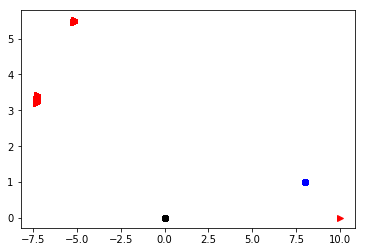

In [29]:
fk = Forward_kinematics()
#e_prev = e
while(inside):
    e = np.matrix(fk.end_effector(t0,t1,t2))
    e_t0 = np.matrix(fk.end_effector(t0_1,t1,t2))
    e_t1 = np.matrix(fk.end_effector(t0,t1_1,t2))
    e_t2 = np.matrix(fk.end_effector(t0,t1,t2_1))
    
    e = e[0:2,3]
    e_t0 = e_t0[0:2,3]
    e_t1 = e_t1[0:2,3]
    e_t2 = e_t2[0:2,3]
    
    e_del_t0 = np.subtract(e_t0,e)
    e_del_t1 = np.subtract(e_t1,e)
    e_del_t2 = np.subtract(e_t2,e)
    
    e_prev = e

    J = np.c_[e_del_t0,e_del_t1,e_del_t2]
    
    J_inv = np.dot((np.linalg.inv(np.transpose(J)*J)),np.transpose(J))
    
    # Finding new End effector position
    sign_x = int(sign(e_des[0][0] , e[0][0]))
    sign_y = int(sign(e_des[1][0] , e[1][0]))
    
    
    p = 0.0001
    y_p = float(e[1][0] + p*sign_y)
    x_p = float(e[0][0] + p*sign_x)

    
    e_del_x = float(e[0][0] - x_p)
    e_del_y = float(e[1][0] - y_p)
    
    e_del_norm = [[e_del_x],[e_del_y]]
    t_del = np.dot(J_inv,e_del_norm)
    
    t_new = np.add([[t0],[t1],[t2]],t_del)
    t0 = float(t_new[0][0])
    t1 = float(t_new[1][0])
    t2 = float(t_new[2][0])
    
    q = 5
    t0_0 = t0 + q*dT0
    t0_1 = t1 + q*dT0
    t0_2 = t2 + q*dT0

    met = np.sqrt((e[0][0]-e_des[0][0])**2 +(e[1][0]-e_des[1][0])**2)
    
    # Plot 
    plt.plot(0,0,'ko')
    #plt.plot(np.squeeze(np.asarray(ini_pos[0][0])), np.squeeze(np.asarray(ini_pos[1][0])), 'yo')    
    plt.plot(e[0][0], e[1][0], 'r>')
    plt.plot(e_des[0][0], e_des[1][0], 'bo')
    plt.show
    
    if met < 0.3 : inside = False

In [49]:
from IPython.display import display
import sympy as sy

sy.init_printing()  # LaTeX like pretty printing for IPython

# declaring symbolic variables:
x, y, X, Y, Z, fx, fy, cx, cy = sy.symbols("x y X Y Z f_x f_y c_x c_y", real=True)
x00, x01, x02, x10, x11 = sy.symbols("x00, x01, x02, x10, x11", real=True)
x12, x20, x21, x22 = sy.symbols("x12, x20, x21, x22", real=True)
Tx, Ty, Tz = sy.symbols(" T_x T_y T_z", real=True)

# Building matrices and vectors:
M = sy.Matrix([X, Y, Z, 1])
m = sy.Matrix([x, y, 1])
K = sy.Matrix([[fx,  0, cx, 0],
               [0,  fy, cy, 0],
               [0,   0,  0, 1]])
T = sy.Matrix([[x00, x01, x02, Tx],
               [x10, x11, x12, Ty],
               [x20, x21, x22, Tz],
               [0,     0,   0,  1]])

print("KTM = K.T.M = ")
KTM = sy.simplify(K*T*M)
display(KTM)

print("Vector of Unkowns xx.T = ")
xx = sy.Matrix(list(T.atoms(sy.Symbol)))
display(xx.T)
print("For equation HH.xx = mm, HH = ")
HH = KTM[:2, :].jacobian(xx)  # calculate the derivative for each unknown
display(HH)

KTM = K.T.M = 


⎡    Tₓ⋅fₓ + T_z⋅cₓ + X⋅(cₓ⋅x₂₀ + fₓ⋅x₀₀) + Y⋅(cₓ⋅x₂₁ + fₓ⋅x₀₁) + Z⋅(cₓ⋅x₂₂ + 
⎢                                                                             
⎢T_y⋅f_y + T_z⋅c_y + X⋅(c_y⋅x₂₀ + f_y⋅x₁₀) + Y⋅(c_y⋅x₂₁ + f_y⋅x₁₁) + Z⋅(c_y⋅x₂
⎢                                                                             
⎣                                            1                                

fₓ⋅x₀₂)     ⎤
            ⎥
₂ + f_y⋅x₁₂)⎥
            ⎥
            ⎦

Vector of Unkowns xx.T = 


[x₀₂  x₀₁  x₁₁  x₂₀  x₂₂  x₁₀  x₀₀  T_y  x₂₁  T_z  Tₓ  x₁₂]

For equation HH.xx = mm, HH = 


⎡Z⋅fₓ  Y⋅fₓ    0    X⋅cₓ   Z⋅cₓ     0    X⋅fₓ   0   Y⋅cₓ   cₓ   fₓ    0  ⎤
⎢                                                                        ⎥
⎣ 0     0    Y⋅f_y  X⋅c_y  Z⋅c_y  X⋅f_y   0    f_y  Y⋅c_y  c_y  0   Z⋅f_y⎦

In [54]:

A0,A1,A2,T0,T1,T2 = sy.symbols("A0 A1 A2 T0 T1 T2",real = True)
t0_1 =sy.Matrix([[np.cos(T0), np.sin(T0), 0, a0*np.cos(T0)]
                 [np.sin(T0), np.cos(T0), 0, a0*np.sin(T0)]
                 [0, 0, 1, 0]
                 [0, 0, 0, 1]])
display(f_j)

AttributeError: 'Symbol' object has no attribute 'cos'

In [57]:

cos(x+y+z)	-sin(x+y+z)	(2*sin(x)+sin(x+y)-sin(x-y)+sin(x+y+z)-sin(x+y-z))/2	a*cos(x)+b*cos(x+y)+c*cos(x+y+z)
sin(x+y+z)	 cos(x+y+z)	        (-cos(x+y)+cos(x-y)-cos(x+y+z)+cos(x+y-z))/2	a*sin(x)+b*sin(x+y)+c*sin(x+y+z)
         0	          0	                                                   1	                               0
         0	          0	                                                   0	                               1


NameError: name 'cos' is not defined

In [ ]:

cos(x+y)	-sin(x+y)	(2*sin(x)+sin(x+y)-sin(x-y))/2	a*cos(x)+b*cos(x+y)
sin(x+y)	 cos(x+y)	        (-cos(x+y)+cos(x-y))/2	a*sin(x)+b*sin(x+y)
       0	        0	                             1	                  0
       0	        0	                             0	                  1
